Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

ID: Customer's unique identifier
Year_Birth: Customer's birth year
Education: Customer's education level
Marital_Status: Customer's marital status
Income: Customer's yearly household income
Kidhome: Number of children in customer's household
Teenhome: Number of teenagers in customer's household
Dt_Customer: Date of customer's enrollment with the company
Recency: Number of days since customer's last purchase
Complain: 1 if the customer complained in the last 2 years, 0 otherwise
Products

MntWines: Amount spent on wine in last 2 years
MntFruits: Amount spent on fruits in last 2 years
MntMeatProducts: Amount spent on meat in last 2 years
MntFishProducts: Amount spent on fish in last 2 years
MntSweetProducts: Amount spent on sweets in last 2 years
MntGoldProds: Amount spent on gold in last 2 years
Promotion

NumDealsPurchases: Number of purchases made with a discount
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

NumWebPurchases: Number of purchases made through the company’s website
NumCatalogPurchases: Number of purchases made using a catalogue
NumStorePurchases: Number of purchases made directly in stores
NumWebVisitsMonth: Number of visits to company’s website in the last month

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql import Window
from pyspark.sql.functions import *
import pandas as pd
spark = SparkSession.builder.appName("home_ass_2").getOrCreate()


df1 = spark.read.csv('marketing_campaign.csv', sep=";", header=True, quote="", inferSchema=True)
df2 = spark.read.csv('dataset.csv', sep = ',', header = True, quote = '', inferSchema = True #Automatically defines the type of the schema
                   )

df2.printSchema()
df1.printSchema()

root
 |-- age: integer (nullable = true)
 |-- Occupation: integer (nullable = true)
 |-- purchase_1: integer (nullable = true)
 |-- purchase_2: integer (nullable = true)
 |-- purchase_3: integer (nullable = true)
 |-- purchase_4: integer (nullable = true)
 |-- purchase_5: integer (nullable = true)

root
 |-- ID: integer (nullable = true)
 |-- Year_Birth: integer (nullable = true)
 |-- Education: string (nullable = true)
 |-- Marital_Status: string (nullable = true)
 |-- Income: integer (nullable = true)
 |-- Kidhome: integer (nullable = true)
 |-- Teenhome: integer (nullable = true)
 |-- Dt_Customer: string (nullable = true)
 |-- Recency: integer (nullable = true)
 |-- MntWines: integer (nullable = true)
 |-- MntFruits: integer (nullable = true)
 |-- MntMeatProducts: integer (nullable = true)
 |-- MntFishProducts: integer (nullable = true)
 |-- MntSweetProducts: integer (nullable = true)
 |-- MntGoldProds: integer (nullable = true)
 |-- NumDealsPurchases: integer (nullable = true)
 |--

In [2]:
# Summing the paid amount per record

df = df2.select( 'age' , 'Occupation',
                     (df2['purchase_1'] +
                     df2['purchase_2'] +
                     df2['purchase_3'] +
                     df2['purchase_4'] +
                     df2['purchase_5']).alias("sum_of_purchases"))

df.show(5)

+---+----------+----------------+
|age|Occupation|sum_of_purchases|
+---+----------+----------------+
| 52|        19|           37929|
| 53|         6|           26744|
| 20|         8|           35927|
| 50|         2|           30775|
| 55|         8|           25914|
+---+----------+----------------+
only showing top 5 rows



In [3]:
# Verifying the loading stage

all_rows = df.count()
all_rows 

21001

In [4]:
# Visualizing the markting df

df1
pd.DataFrame(df1.take(10), columns=df1.columns) 

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513,0,1,2013-09-09,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635,0,1,2012-11-13,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454,1,0,2013-05-08,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351,1,0,2013-06-06,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648,1,1,2014-03-13,68,28,...,20,1,0,0,0,0,0,3,11,0


In [5]:
# Data cleaning and repairing for learning process

from datetime import date
current_year = date.today().year
current_year 

2022

In [6]:
 # Replacing Year Birth with age for joining tables
    
df1 = df1.withColumn( 'age1' , current_year - df1['Year_Birth'])

In [7]:
# Joining tables, cleaning unmatched records and duplicate removal

cond = [df.age == df1.age1]
df3 = df.filter(df.age>25).join(df1, cond, 'inner')
df3 = df3.dropDuplicates(["Dt_Customer","Income"])
df3 = df3.distinct()
df3 = df3.dropna()

df3

pd.DataFrame(df3.take(100), columns=df3.columns)



,age,Occupation,sum_of_purchases,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age1
0,52,19,37929,6653,1970,PhD,Married,55158,1,1,...,0,0,0,0,0,0,3,11,1,52
1,46,6,38592,4692,1976,Graduation,Married,7500,1,0,...,1,0,0,0,0,0,3,11,1,46
2,65,10,49814,7118,1957,Graduation,Married,73803,0,1,...,1,0,0,0,0,0,3,11,1,65
3,63,7,26242,2611,1959,Master,Together,82576,0,0,...,0,0,1,0,0,0,3,11,0,63
4,59,6,24604,5117,1963,2n Cycle,Married,32632,0,0,...,0,0,0,0,0,0,3,11,0,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,58,20,24757,5589,1964,Graduation,Divorced,51983,0,1,...,0,0,0,0,0,0,3,11,0,58
96,46,6,38592,8852,1976,Graduation,Married,61064,0,1,...,0,0,0,0,0,0,3,11,0,46
97,62,11,33738,7787,1960,Graduation,Together,62807,0,1,...,0,0,0,0,0,0,3,11,0,62
98,34,7,24458,2747,1988,PhD,Married,67546,0,0,...,0,0,0,0,0,0,3,11,0,34


In [8]:
# Verifying df after joining and cleaning

all_rows3 = df3.count()
all_rows3

1848

In [9]:
# Dropping unnecessary columns for training stage

df3 = df3.drop("Year_Birth",'age1','Dt_Customer','ID') 

In [10]:
# Replacing string columns to learnable indexes

from pyspark.ml.feature import StringIndexer

marital_int = StringIndexer(inputCol='Marital_Status', outputCol='marital_int')
marital_int_model = marital_int.fit(df3)
df3 = marital_int_model.transform(df3)

education_int = StringIndexer(inputCol='Education', outputCol='education_int')
education_int_model = education_int.fit(df3)
df3 = education_int_model.transform(df3)

In [11]:
df3.printSchema()

root
 |-- age: integer (nullable = true)
 |-- Occupation: integer (nullable = true)
 |-- sum_of_purchases: integer (nullable = true)
 |-- Education: string (nullable = true)
 |-- Marital_Status: string (nullable = true)
 |-- Income: integer (nullable = true)
 |-- Kidhome: integer (nullable = true)
 |-- Teenhome: integer (nullable = true)
 |-- Recency: integer (nullable = true)
 |-- MntWines: integer (nullable = true)
 |-- MntFruits: integer (nullable = true)
 |-- MntMeatProducts: integer (nullable = true)
 |-- MntFishProducts: integer (nullable = true)
 |-- MntSweetProducts: integer (nullable = true)
 |-- MntGoldProds: integer (nullable = true)
 |-- NumDealsPurchases: integer (nullable = true)
 |-- NumWebPurchases: integer (nullable = true)
 |-- NumCatalogPurchases: integer (nullable = true)
 |-- NumStorePurchases: integer (nullable = true)
 |-- NumWebVisitsMonth: integer (nullable = true)
 |-- AcceptedCmp3: integer (nullable = true)
 |-- AcceptedCmp4: integer (nullable = true)
 |-- Ac

In [12]:
# Dropping unnecessary columns for training stage

df3 = df3.drop("Marital_Status",
               'age1',
               'Education',
               'Z_Revenue',
               'Z_CostContact'
              ) 

In [13]:
# Verifying the new Schema
df3.printSchema()

root
 |-- age: integer (nullable = true)
 |-- Occupation: integer (nullable = true)
 |-- sum_of_purchases: integer (nullable = true)
 |-- Income: integer (nullable = true)
 |-- Kidhome: integer (nullable = true)
 |-- Teenhome: integer (nullable = true)
 |-- Recency: integer (nullable = true)
 |-- MntWines: integer (nullable = true)
 |-- MntFruits: integer (nullable = true)
 |-- MntMeatProducts: integer (nullable = true)
 |-- MntFishProducts: integer (nullable = true)
 |-- MntSweetProducts: integer (nullable = true)
 |-- MntGoldProds: integer (nullable = true)
 |-- NumDealsPurchases: integer (nullable = true)
 |-- NumWebPurchases: integer (nullable = true)
 |-- NumCatalogPurchases: integer (nullable = true)
 |-- NumStorePurchases: integer (nullable = true)
 |-- NumWebVisitsMonth: integer (nullable = true)
 |-- AcceptedCmp3: integer (nullable = true)
 |-- AcceptedCmp4: integer (nullable = true)
 |-- AcceptedCmp5: integer (nullable = true)
 |-- AcceptedCmp1: integer (nullable = true)
 |--

In [14]:
# Verifying features Correlation on our table before building an ML model 

from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

CorrDF = df3.sample(False, 1.0, 46)

vector_features = "features"
assembler = VectorAssembler(inputCols=CorrDF.columns, outputCol=vector_features)

df3_vector = assembler.transform(df3).select(vector_features)
matrix = Correlation.corr(df3_vector, vector_features, 'pearson')

result = matrix.collect()[0]["pearson({})".format(vector_features)].values
reshape_matrix = pd.DataFrame(result.reshape(-1, len(CorrDF.columns)), columns=CorrDF.columns, index=CorrDF.columns)

print(reshape_matrix)

                          age  Occupation  sum_of_purchases    Income  \
age                  1.000000   -0.107566         -0.032487  0.137977   
Occupation          -0.107566    1.000000         -0.135013  0.005859   
sum_of_purchases    -0.032487   -0.135013          1.000000  0.010694   
Income               0.137977    0.005859          0.010694  1.000000   
Kidhome             -0.213593   -0.012684          0.036781 -0.422855   
Teenhome             0.449131   -0.028914         -0.014530  0.047731   
Recency              0.023210   -0.012904         -0.040228 -0.008357   
MntWines             0.143427   -0.006362         -0.027811  0.559837   
MntFruits            0.004094    0.033439          0.003069  0.418186   
MntMeatProducts      0.002844    0.008871          0.023771  0.568096   
MntFishProducts      0.012263    0.005502          0.009585  0.428229   
MntSweetProducts     0.009701    0.017369          0.000824  0.425843   
MntGoldProds         0.044512    0.024777         -

C:\Users\snirt\AppData\Local\Temp/ipykernel_24024/209039566.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figr.show()


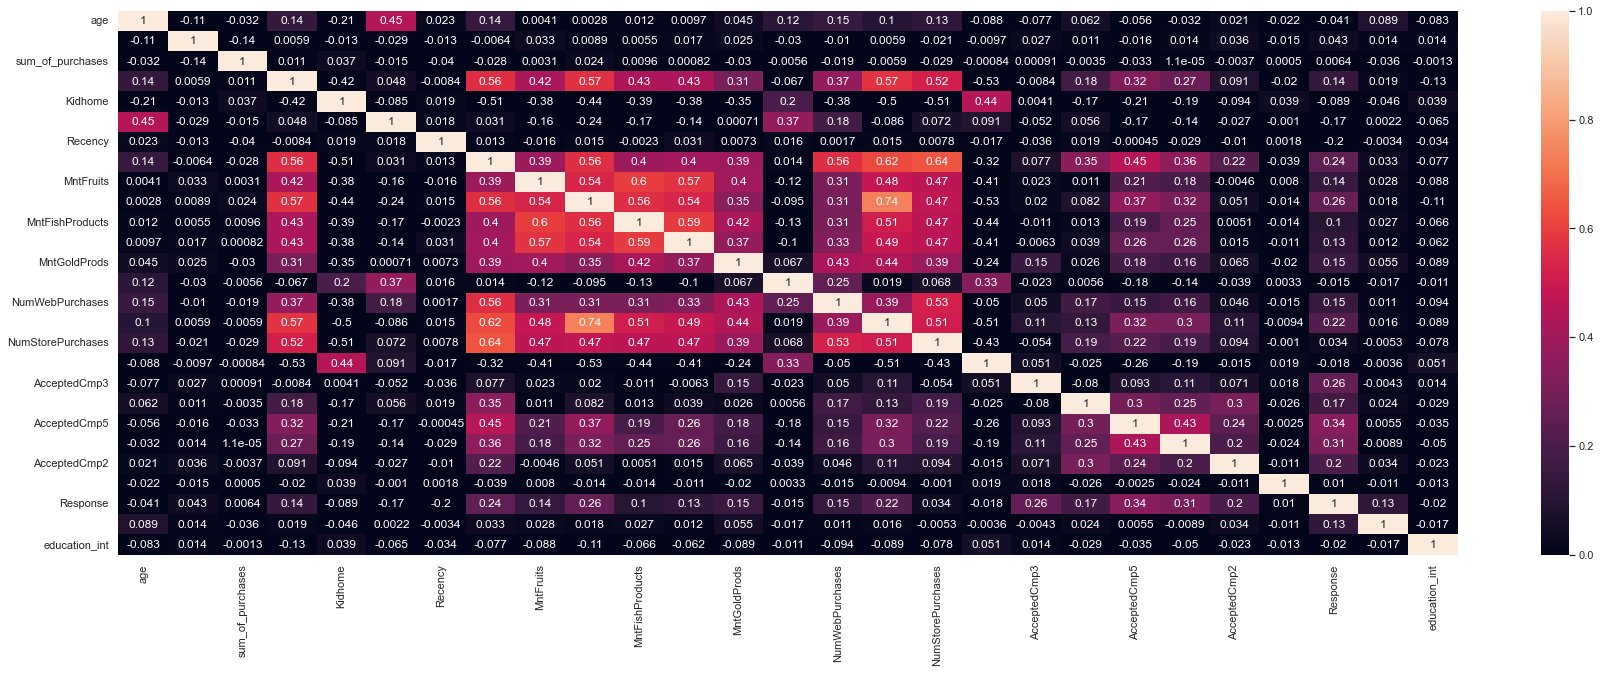

In [15]:
# Plotting features correlation for visual understanding

import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt
ax = sns.heatmap(reshape_matrix, vmin=-0, vmax=1, annot=True)
figr = plt.gcf()
figr.set_size_inches(30, 10)
figr.show()

In [16]:
# Counting num of supported rows in our targrt column

df3.groupby('Response').count().toPandas()

,Response,count
0,1,275
1,0,1573


# Decision Tree

In [28]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from sklearn.metrics import classification_report, confusion_matrix
from pyspark.ml.feature import VectorAssembler

# Training columns

feature_columns = df3.columns[:len(df3.columns)-3]                             

# Target column & data vector creation

assembler = VectorAssembler(inputCols = feature_columns, outputCol="features")  
data_vector = assembler.transform(df3)                                         
data_vector 

# Spliting the data for train and test data

(train, test) = data_vector.randomSplit([0.8,0.2], seed =1948)                 
print("train #: " + str(train.count()),"test #: " + str(test.count()))             


# Implemnting Decision Tree Classifier on our data and chosing the depth wanted

dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'Response', maxDepth = 5)
dtModel = dt.fit(train) 
dt_predictions = dtModel.transform(test)


# Model accuracy chack

AccuracyDT = MulticlassClassificationEvaluator(labelCol = 'Response', metricName = 'accuracy')
print(' DT Accuracy:', AccuracyDT.evaluate(dt_predictions))


# Visualising the model rsults in a data frame

model = dt.fit(data_vector)
predictions1 = model.transform(data_vector)
predictions1.select(['Response','age','prediction','probability']).show(5)


# Confusion matrix creation

y_t1 = predictions1.select(['Response']).collect()
y_predictions1 = predictions1.select(['prediction']).collect()
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_t1, y_predictions1))


train #: 1437 test #: 411
 DT Accuracy: 0.8418491484184915
+--------+---+----------+--------------------+
|Response|age|prediction|         probability|
+--------+---+----------+--------------------+
|       1| 52|       0.0|[0.95147313691507...|
|       1| 46|       1.0|[0.13636363636363...|
|       1| 65|       1.0|[0.23076923076923...|
|       0| 63|       0.0|[0.78260869565217...|
|       0| 59|       0.0|[0.95147313691507...|
+--------+---+----------+--------------------+
only showing top 5 rows

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1573
           1       0.91      0.43      0.58       275

    accuracy                           0.91      1848
   macro avg       0.91      0.71      0.76      1848
weighted avg       0.91      0.91      0.89      1848



In [30]:
# from spark_tree_plotting import plot_tree
# from spark_tree_plotting import export_graphviz
# from PIL import Image
# import io

# #feature names cane be cosmetic arguments, need not be same as the ones in the input table, as long we have traceability at our end.
# png_string = plot_tree(dtModel,
#                        featureNames= feature_columns,
#                        categoryNames={},
#                        classNames=labelIndexer.labels,
#                        filled=True,
#                        roundedCorners=True,
#                        roundLeaves=True)
                       
# image = Image.open(io.BytesIO(png_string))

[[1562   11]
 [ 158  117]]


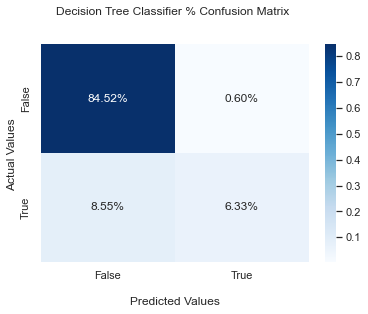

In [19]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

#Generate the confusion matrix
cf_matrix1 = confusion_matrix(y_t1, y_predictions1)

print(cf_matrix1)

ax = sns.heatmap(cf_matrix1/np.sum(cf_matrix1), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Decision Tree Classifier % Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Random Forest

In [20]:
# Implemnting Random Forest Classifier on our data

from pyspark.ml.classification import RandomForestClassifier

RF = RandomForestClassifier(featuresCol = 'features', labelCol = 'Response')
RFModel = RF.fit(train)
RF_predictions = RFModel.transform(test)


# Visualising the model rsults in a data frame

model = RF.fit(data_vector)
predictions2 = model.transform(data_vector)
predictions2.select(['Response','age','prediction','probability']).show(5)


# Model accuracy chack

pd.DataFrame(RF_predictions.take(10), columns=RF_predictions.columns).transpose()
AccuracyRF = MulticlassClassificationEvaluator(labelCol = 'Response', metricName = 'accuracy')
print(' RF Accuracy:', AccuracyRF.evaluate(RF_predictions))


# Confusion matrix creation

y_t2 = RF_predictions.select(['Response']).collect()
y_predictions2 = RF_predictions.select(['prediction']).collect()
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_t2, y_predictions2))

+--------+---+----------+--------------------+
|Response|age|prediction|         probability|
+--------+---+----------+--------------------+
|       1| 52|       0.0|[0.90541676107340...|
|       1| 46|       1.0|[0.45233977846762...|
|       1| 65|       0.0|[0.71991101880407...|
|       0| 63|       0.0|[0.68154399392048...|
|       0| 59|       0.0|[0.90014682160520...|
+--------+---+----------+--------------------+
only showing top 5 rows

 RF Accuracy: 0.8223844282238443
              precision    recall  f1-score   support

           0       0.82      0.99      0.90       328
           1       0.86      0.14      0.25        83

    accuracy                           0.82       411
   macro avg       0.84      0.57      0.57       411
weighted avg       0.83      0.82      0.77       411



[[326   2]
 [ 71  12]]


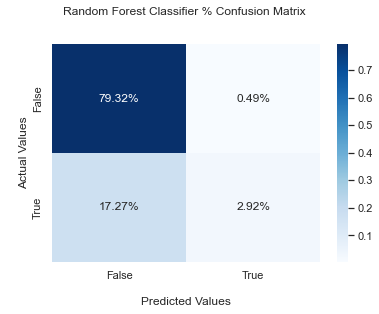

In [21]:
# Presentage Confusion matrix plotting

import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

#Generate the confusion matrix
cf_matrix2 = confusion_matrix(y_t2, y_predictions2)

print(cf_matrix2)

ax = sns.heatmap(cf_matrix2/np.sum(cf_matrix2), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Random Forest Classifier % Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('\nActual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Logistic Regression

In [22]:
from pyspark.ml.classification import LogisticRegression

# Implemnting Logistic Regression model on our data

lr = LogisticRegression(featuresCol = 'features', labelCol = 'Response', maxIter=10)
lrModel = lr.fit(train)
lr_predictions = lrModel.transform(test)


# Visualising the model rsults in a data frame

model = lr.fit(data_vector)
predictions2 = model.transform(data_vector)
predictions2.select(['Response','age','prediction','probability']).show(5)


# Model accuracy chack

pd.DataFrame(lr_predictions.take(10), columns=lr_predictions.columns).transpose()
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
AccuracyLG = MulticlassClassificationEvaluator(labelCol = 'Response', metricName = 'accuracy')
print(' LogisticRegression Accuracy:', AccuracyLG.evaluate(lr_predictions))

# Confusion matrix creation

y_t3 = lr_predictions.select(['Response']).collect()
y_predictions3 = lr_predictions.select(['prediction']).collect()
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_t3, y_predictions3))

+--------+---+----------+--------------------+
|Response|age|prediction|         probability|
+--------+---+----------+--------------------+
|       1| 52|       0.0|[0.95786573407117...|
|       1| 46|       1.0|[0.25990383112835...|
|       1| 65|       1.0|[0.47020595947119...|
|       0| 63|       0.0|[0.90721038875112...|
|       0| 59|       0.0|[0.91362184794381...|
+--------+---+----------+--------------------+
only showing top 5 rows

 LogisticRegression Accuracy: 0.8491484184914841
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       328
           1       0.73      0.40      0.52        83

    accuracy                           0.85       411
   macro avg       0.80      0.68      0.71       411
weighted avg       0.84      0.85      0.83       411



[[316  12]
 [ 50  33]]


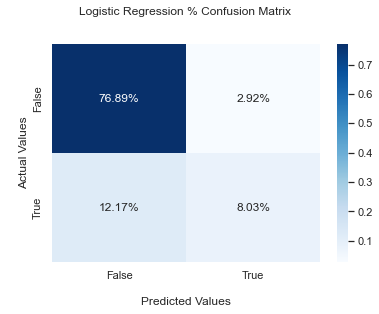

In [23]:
# Presentage Confusion matrix plotting

import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

#Generate the confusion matrix
cf_matrix3 = confusion_matrix(y_t3, y_predictions3)

print(cf_matrix3)

ax = sns.heatmap(cf_matrix3/np.sum(cf_matrix3), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Logistic Regression % Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('\nActual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()